 ## Required modules

In [40]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("moviereviews.tsv",sep='\t')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [10]:
len(df)

2000

In [9]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

label     0
review    0
dtype: int64

## data preprocessing

### check if there is review is empty string

In [17]:
blanks=[]
for i,label,review in df.itertuples():
    if review.isspace():
        blanks.append(i)
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [21]:
df=df.drop(blanks)

In [22]:
blanks2=[]
for i,label,review in df.itertuples():
    if review.isspace():
        blanks2.append(i)
blanks2

[]

 ## Now the original dataframe are cleaned 

# Spliting data to train and test using sklearn

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(df['review'],df['label'],test_size=0.3,random_state=42)

In [25]:
print(f"Train size is {xtrain.shape}")

Train size is (1356,)


In [26]:
print(f"Test size is {xtest.shape}")

Test size is (582,)


In [52]:
classifier=Pipeline([('tfidf',TfidfVectorizer()),('svm',LinearSVC())])

In [53]:
classifier.fit(xtrain,ytrain)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', LinearSVC())])

In [47]:
predictions=classifier.predict(xtest)

In [48]:
cm=metrics.confusion_matrix(ytest,predictions)

Text(42.0, 0.5, 'Truth')

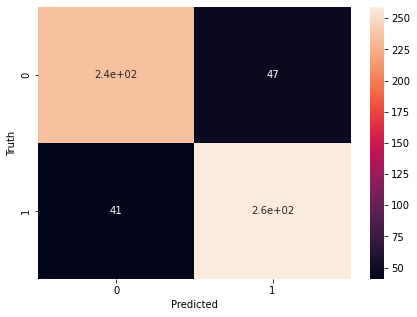

In [49]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
print(metrics.classification_report(ytest,predictions))

              precision    recall  f1-score   support

         neg       0.85      0.83      0.84       282
         pos       0.85      0.86      0.85       300

    accuracy                           0.85       582
   macro avg       0.85      0.85      0.85       582
weighted avg       0.85      0.85      0.85       582



In [51]:
print(metrics.accuracy_score(ytest,predictions))

0.8487972508591065


## Try predict review from imddb on mouse hunt 
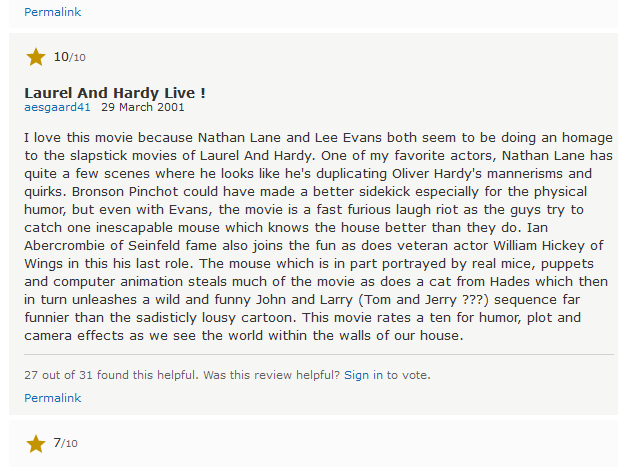

In [59]:
classifier.predict(["I love this movie because Nathan Lane and Lee Evans both seem to be doing an homage to the slapstick movies of Laurel And Hardy. One of my favorite actors, Nathan Lane has quite a few scenes where he looks like he's duplicating Oliver Hardy's mannerisms and quirks. Bronson Pinchot could have made a better sidekick especially for the physical humor, but even with Evans, the movie is a fast furious laugh riot as the guys try to catch one inescapable mouse which knows the house better than they do. Ian Abercrombie of Seinfeld fame also joins the fun as does veteran actor William Hickey of Wings in this his last role. The mouse which is in part portrayed by real mice, puppets and computer animation steals much of the movie as does a cat from Hades which then in turn unleashes a wild and funny John and Larry (Tom and Jerry ???) sequence far funnier than the sadisticly lousy cartoon. This movie rates a ten for humor, plot and camera effects as we see the world within the walls of our house."])

array(['pos'], dtype=object)

# Predict other review
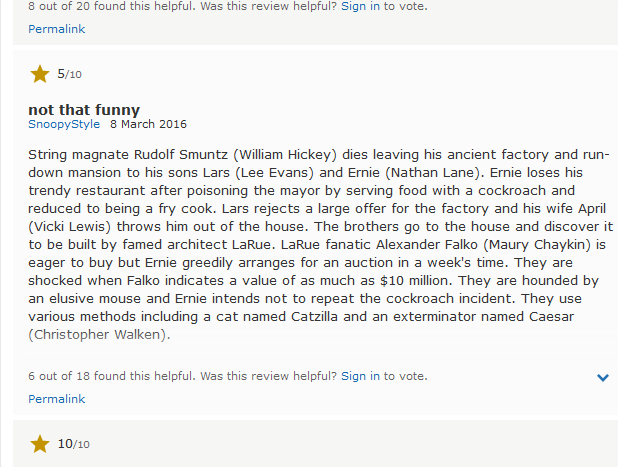

In [58]:
classifier.predict(["String magnate Rudolf Smuntz (William Hickey) dies leaving his ancient factory and run-down mansion to his sons Lars (Lee Evans) and Ernie (Nathan Lane). Ernie loses his trendy restaurant after poisoning the mayor by serving food with a cockroach and reduced to being a fry cook. Lars rejects a large offer for the factory and his wife April (Vicki Lewis) throws him out of the house. The brothers go to the house and discover it to be built by famed architect LaRue. LaRue fanatic Alexander Falko (Maury Chaykin) is eager to buy but Ernie greedily arranges for an auction in a week's time. They are shocked when Falko indicates a value of as much as $10 million. They are hounded by an elusive mouse and Ernie intends not to repeat the cockroach incident. They use various methods including a cat named Catzilla and an exterminator named Caesar (Christopher Walken) This is simply not that funny. It's a sort of reverse Home Alone. It is following the Wet Bandits without Macaulay. I actually think this movie needs a cute animated mouse whom the audience can root for. It might be funnier from the viewpoint of the mouse. Ernie's motivation doesn't make much sense. It's a lot slapstick and destruction resulting in limited laughs. The movie could go full throttle Three Stooges but it doesn't have that childlike quality. They are too money grubbing for that. There is nothing particularly bad or hateful about this. It's just not that funny."])

array(['neg'], dtype=object)